In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
 
from sklearn.preprocessing import PolynomialFeatures

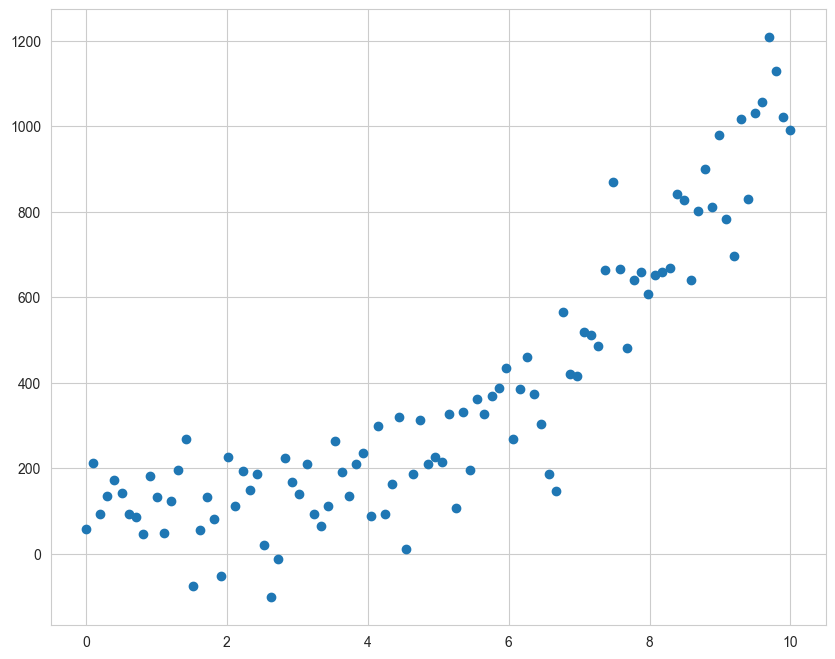

In [6]:
n_samples = 100
 
X = np.linspace(0, 10, 100)
rng = np.random.randn(n_samples) * 100
 
ya = X ** 3 + 100 + rng
 
plt.figure(figsize=(10,8));
plt.scatter(X, ya);

array([[1309.66179974]])

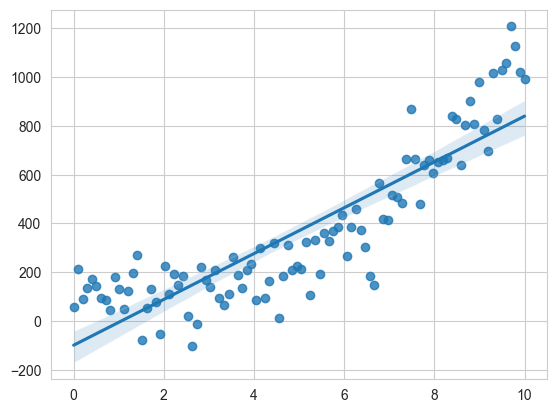

In [7]:
#Example #2

model = LinearRegression()
model.fit(X.reshape(-1,1), ya.reshape(-1,1))
sns.regplot(x=X,y=ya)
model.predict(np.array([15]).reshape(1,-1))

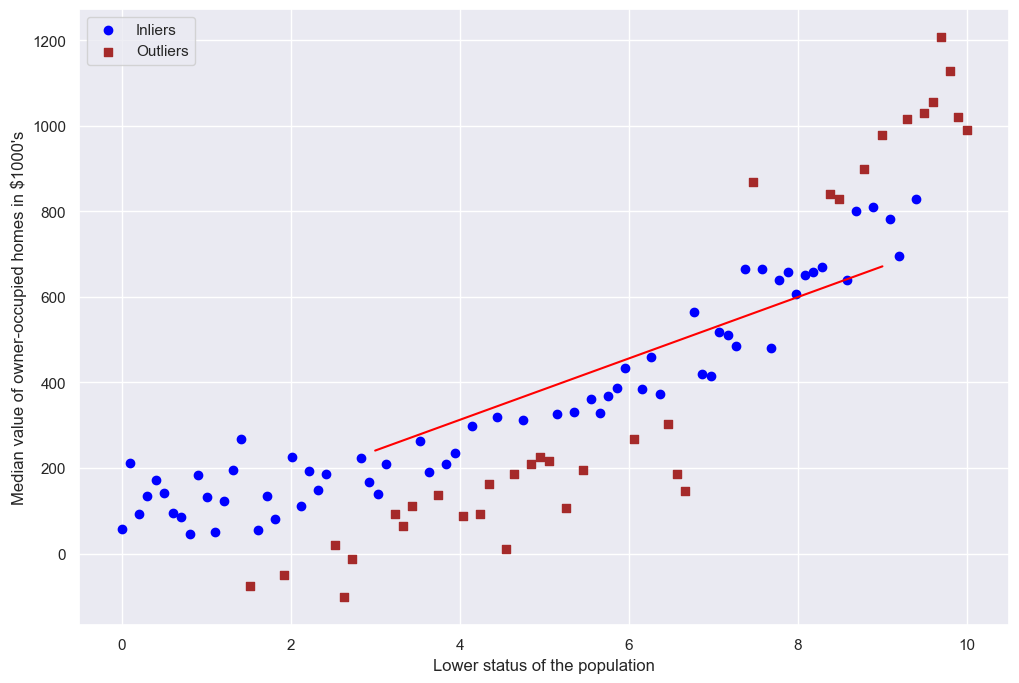

In [11]:
from sklearn.linear_model import RANSACRegressor
ransac = RANSACRegressor()
ransac.fit(X.reshape(-1,1), ya.reshape(-1,1))
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

 
np.arange(3, 10, 1)
line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X.reshape(-1, 1))

sns.set(style='darkgrid', context='notebook')
plt.figure(figsize=(12,8));
plt.scatter(X[inlier_mask], ya[inlier_mask],
            c='blue', marker='o', label='Inliers')
plt.scatter(X[outlier_mask], ya[outlier_mask],
            c='brown', marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='red')

plt.xlabel('Lower status of the population')
plt.ylabel("Median value of owner-occupied homes in $1000's")
plt.legend(loc='upper left')
plt.show()


In [19]:
poly_reg = PolynomialFeatures(degree=5)
X_poly = poly_reg.fit_transform(X.reshape(-1, 1))
 
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, ya.reshape(-1, 1))
y_pred = lin_reg_2.predict(X_poly)

0.9036271859967325


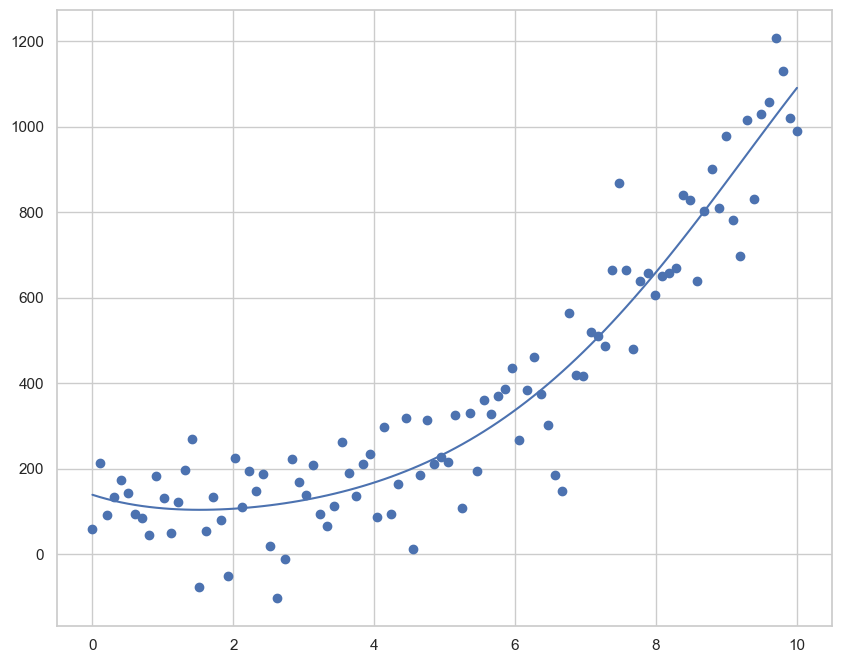

In [20]:
plt.figure(figsize=(10,8));
plt.scatter(X, ya);
plt.plot(X, y_pred);
print(r2_score(ya, y_pred))